# Exploratory Data Analysis (EDA)

## Legacy Reimbursement System — Pattern Discovery

**Author:** Ambe Mbong
**Date:** November 2, 2025  

**Goal:**  
Explore travel & reimbursement data to identify patterns, correlations, outliers, and potential hidden business rules.


## 1. Import and Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)  #so all dataframe columns can be shown.
plt.style.use('default')

## 2. Loading the Data

In [3]:
# readx the CSV file into a Pandas DataFrame and displaying the first few rows of that DataFrame.
df = pd.read_csv("public_cases.csv")
df.head(20)

,trip_duration_days,miles_traveled,total_receipts_amount,expected_output
0,3,93.0,1.42,364.51
1,1,55.0,3.60,126.06
2,1,47.0,17.97,128.91
3,2,13.0,4.67,203.52
4,3,88.0,5.78,380.37
5,1,76.0,13.74,158.35
6,3,41.0,4.52,320.12
7,1,140.0,22.71,199.68
8,3,121.0,21.17,464.07
9,3,117.0,21.99,359.10


## 3. Data Overview

### 3.1 Shape and Information

In [4]:
# obtaining information about the DataFrame
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_duration_days     1000 non-null   int64  
 1   miles_traveled         1000 non-null   float64
 2   total_receipts_amount  1000 non-null   float64
 3   expected_output        1000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


### 3.2 Summary Statistics for the Data

In [6]:
df.describe()

,trip_duration_days,miles_traveled,total_receipts_amount,expected_output
count,1000.000000,1000.00000,1000.00000,1000.000000
mean,7.043000,597.41374,1211.05687,1349.114030
std,3.926139,351.29979,742.85418,470.316464
min,1.000000,5.00000,1.42000,117.240000
25%,4.000000,275.96000,530.37750,1019.297500
50%,7.000000,621.00000,1171.90000,1454.260000
75%,10.000000,893.00000,1881.10500,1711.122500
max,14.000000,1317.07000,2503.46000,2337.730000


## 4. Missing Values

In [8]:
if df.isnull().sum().sum() == 0:
    print("No missing values in the DataFrame.")
else:
    missing_values = df.isnull().sum()
    print("Missing Values per Column:")
    print(missing_values)

    plt.figure(figsize=(5, 2))
    plt.bar(df.columns, missing_values)
    plt.title("Missing Values per Column")
    plt.xticks(rotation=45)
    plt.show()

No missing values in the DataFrame.


## 5. Distributions of Key Variables

### Scatter-Plot Matrix with Correlations & Trendlines

#### Purpose:
This scatter-plot matrix visualizes relationships between trip duration, miles traveled, receipts, and reimbursement.

- Lower triangle → scatter plots + linear trendlines

- Upper triangle → correlation coefficients (r)

- Diagonal → variable distributions (histograms)

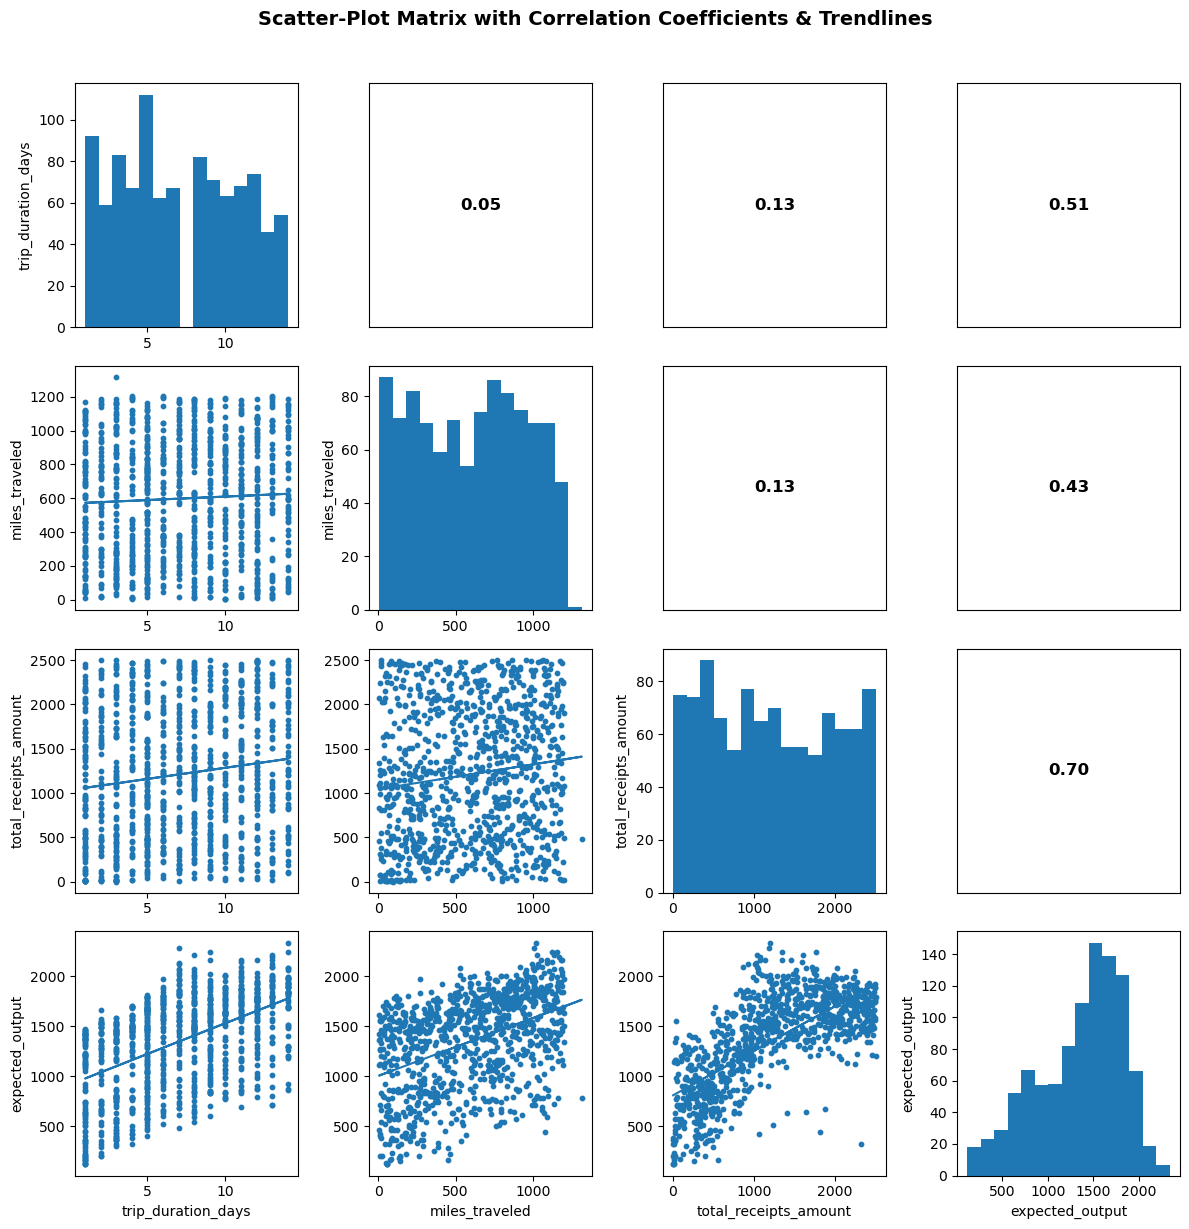

In [24]:
cols = [
    'trip_duration_days', 
    'miles_traveled', 
    'total_receipts_amount', 
    'expected_output'
]

data = df[cols]

n = len(cols)
fig, axes = plt.subplots(n, n, figsize=(12, 12))

for i in range(n):
    for j in range(n):
        ax = axes[i, j]

        if i == j:
            # Diagonal: histogram
            ax.hist(data[cols[i]], bins=15)
            ax.set_ylabel(cols[i])

        elif i > j:
            # Lower triangle: scatter + trendline
            x = data[cols[j]]
            y = data[cols[i]]

            ax.scatter(x, y, s=10)

            # Linear trendline
            m, b = np.polyfit(x, y, 1)
            ax.plot(x, m*x + b)

        else:
            # Upper triangle: correlation coefficient
            corr = np.corrcoef(data[cols[j]], data[cols[i]])[0, 1]
            ax.text(
                0.5, 0.5,
                f"{corr:.2f}",
                ha='center', va='center',
                fontsize=12, fontweight='bold'
            )
            ax.set_xticks([])
            ax.set_yticks([])

        # Label only outer edges
        if i == n - 1:
            ax.set_xlabel(cols[j])
        if j == 0 and i != j:
            ax.set_ylabel(cols[i])

plt.suptitle(
    "Scatter-Plot Matrix with Correlation Coefficients & Trendlines",
    fontsize=14, fontweight="bold", y=1.02
)

plt.tight_layout()
plt.show()

## 6. Boxplot for Outliers

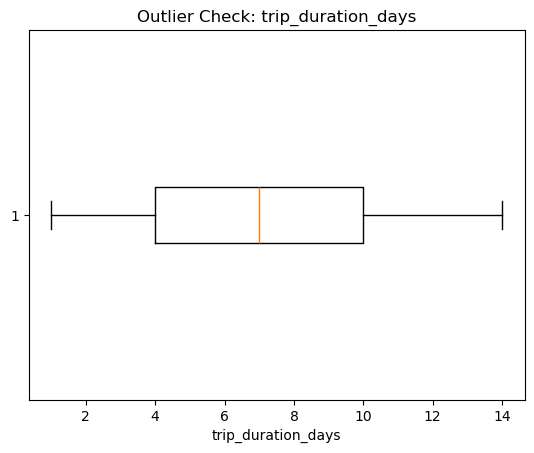

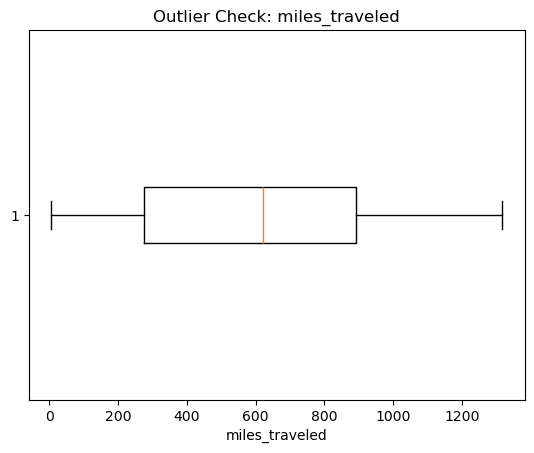

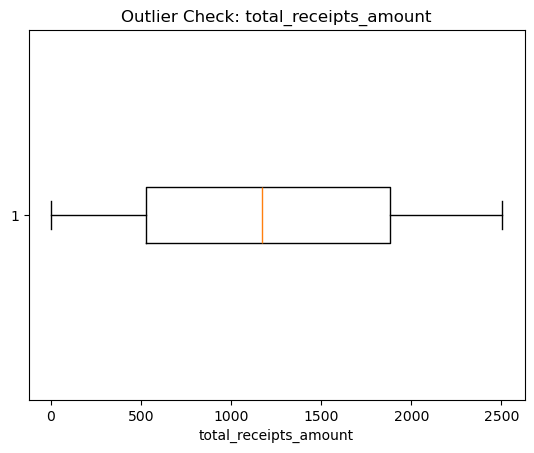

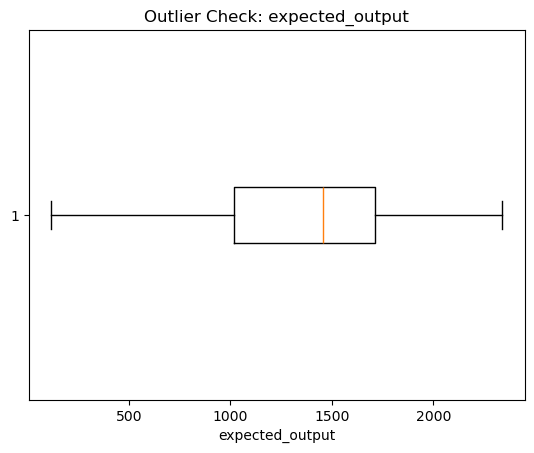

In [11]:
for c in cols:
    plt.figure()
    plt.boxplot(df[c], vert=False)
    plt.title(f"Outlier Check: {c}")
    plt.xlabel(c)
    plt.show()

## 7. Creating and Exploring Derived Features 

In [21]:
df['miles_per_day'] = df['miles_traveled'] / df['trip_duration_days']
df['spend_per_day'] = df['total_receipts_amount'] / df['trip_duration_days']
df['spend_per_mile'] = df['total_receipts_amount'] / df['miles_traveled']

df[['miles_per_day', 'spend_per_day', 'spend_per_mile']].describe()


,miles_per_day,spend_per_day,spend_per_mile
count,1000.000000,1000.000000,1000.000000
mean,147.026195,285.706081,6.052064
std,193.820610,381.707793,21.148138
min,0.500000,0.473333,0.015269
25%,43.846154,85.845821,0.980573
50%,83.261364,169.089176,1.952640
75%,152.650000,300.643071,3.703540
max,1166.000000,2452.850000,296.514286


### Scatter-Plot Matrix with Correlations & Trendlines

#### Purpose:
This scatter-plot matrix visualizes relationships between the derived features miles_per_day, spend_per_day, spend_per_mile, and reimbursement.

- Lower triangle → scatter plots + linear trendlines

- Upper triangle → correlation coefficients (r)

- Diagonal → variable distributions (histograms)

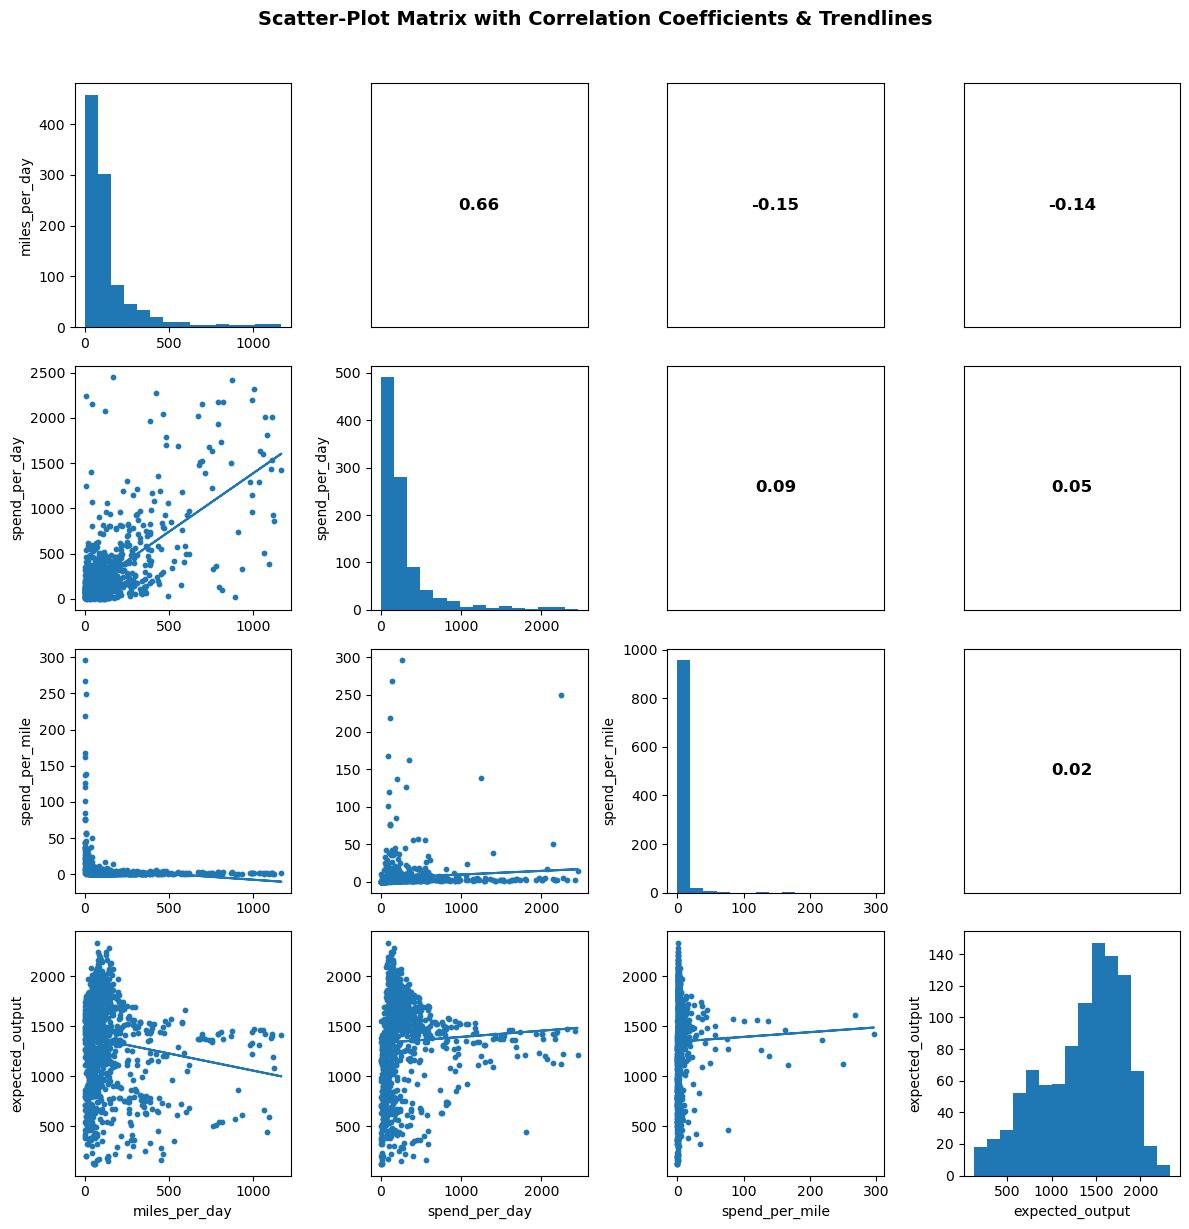

In [26]:
cols = ['miles_per_day','spend_per_day','spend_per_mile','expected_output']

data = df[cols]

n = len(cols)
fig, axes = plt.subplots(n, n, figsize=(12, 12))

for i in range(n):
    for j in range(n):
        ax = axes[i, j]

        if i == j:
            # Diagonal: histogram
            ax.hist(data[cols[i]], bins=15)
            ax.set_ylabel(cols[i])

        elif i > j:
            # Lower triangle: scatter + trendline
            x = data[cols[j]]
            y = data[cols[i]]

            ax.scatter(x, y, s=10)

            # Linear trendline
            m, b = np.polyfit(x, y, 1)
            ax.plot(x, m*x + b)

        else:
            # Upper triangle: correlation coefficient
            corr = np.corrcoef(data[cols[j]], data[cols[i]])[0, 1]
            ax.text(
                0.5, 0.5,
                f"{corr:.2f}",
                ha='center', va='center',
                fontsize=12, fontweight='bold'
            )
            ax.set_xticks([])
            ax.set_yticks([])

        # Label only outer edges
        if i == n - 1:
            ax.set_xlabel(cols[j])
        if j == 0 and i != j:
            ax.set_ylabel(cols[i])

plt.suptitle(
    "Scatter-Plot Matrix with Correlation Coefficients & Trendlines",
    fontsize=14, fontweight="bold", y=1.02
)

plt.tight_layout()
plt.show()

## 8. Insights and Observations

### 1. No Major Outliers

- Boxplots for trip duration, miles traveled, receipts, and reimbursement show no extreme outliers.

- Data appears reasonably clean, suggesting stable system behavior (even if it’s quirky).

### 2. Strongest Linear Driver: Total Receipts

- Correlation between receipts and reimbursement ≈ 0.70 (the strongest relationship).

- The scatter plot shows a positive upward trend. More receipts generally imply higher reimbursement. But the relationship is non-linear (flattening at higher receipts), consistent with interview claims: “Diminishing returns on high receipts.”

### 3. Miles Traveled Has Weak Linear Impact

- Correlation between miles and reimbursement ≈ 0.13 – 0.15 (weak).

- Slight upward trendline implying some effect but not strong. It also suggests that mileage matters, but not proportionally. It also matches employee comments: “First 100 miles are full rate, then rates drop.”

### 4. Trip Duration Correlates Moderately

- Duration vs. reimbursement correlation ≈ 0.50.

- Longer trips imply higher reimbursement, but there is a non-linear pattern

- Some ranges appear “sweet spots” (~4–6 days) which confirms employee anecdote: “5-day trips get bonuses.”

### 5. Derived Features Reveal Non-Linear Behavior

From the engineered features (spend per mile, spend per day):

- Spend per day vs reimbursement shows a positive relationship, but it is weak.

- Spend per mile vs reimbursement shows a very weak or noisy signal.

- This means that the System rewards balanced / efficient spending, not raw spending. Spending efficiency matters more than absolute amount. It matches the employee comment: “High spend + long trip = penalty”, “Efficiency bonus exists”

### 6. Data Distribution Looks Realistic

Histograms show:

- Receipts skewed right as expected.

- Miles skewed right (typical business travel)

- Reimbursement is slightly skewed, but the central cluster is visible.

No obvious data generation anomalies.

## 9. Conclusion

The exploratory data analysis reveals a system driven predominantly by receipt amounts, with trip duration playing a secondary role and mileage contributing weakly but non-linearly. There is clear evidence of diminishing returns on high spending and mileage, suggesting complex business logic beyond simple linear reimbursement rules. Scatter plot structures, moderate correlations, and non-linear behavior support employee observations of “sweet spots,” efficiency bonuses, and penalty zones. No significant outliers are present, and feature distributions resemble realistic business travel behavior. These findings indicate that the legacy system likely uses tiered logic and interaction effects, potentially with random noise or rule-based conditionals.